In [1]:
# importing libs
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import datetime as dt
import squarify

In [2]:
# reading the dataset
data=pd.read_csv('C:/Users/monal/Downloads/train.csv',encoding='utf-8')

In [3]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Data Exploring

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

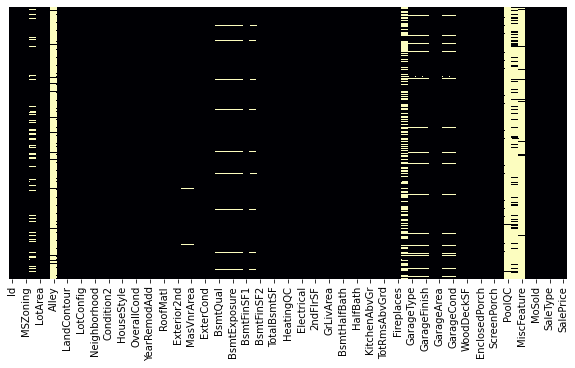

In [5]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5)) 
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False,cbar=False)
plt.show()

In [6]:
#getting the unique value in Remark attribute.
data['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [7]:
#checking how many null values are their in `PoolQC` attribute
data[data['PoolQC'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
#filling null value with "others" for attributes other than 'PoolQC'.
data[1:-2].fillna('others',inplace=True)

C:\Users\monal\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [9]:
data['PoolQC'].unique()

array([nan, 'others', 'Ex', 'Fa', 'Gd'], dtype=object)

In [10]:
# checking how many values are presen with value nan
data[(data['PoolQC']=='nan')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [14]:
# checking how many values are presen with value NaN
data[(data['Alley']=='NA')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [12]:
data['Alley'].unique()

array([nan, 'others', 'Grvl', 'Pave'], dtype=object)

In [15]:
data.shape

(1460, 81)

In [16]:
#checking wheather we have processed all the null values
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [17]:
data.dropna(inplace=True)

In [18]:
data.shape

(1118, 81)

# Visualization

In [20]:
## creating new list to having startups with their total funding
tophousingprice=[]
for sellingprice in data['Neighborhood'].unique():
    df=data[data['Neighborhood']== sellingprice ]    ## get the dataframe for each startup
    sum=np.sum(df['SalePrice'])         ## sum total funding of startup
    tophousingprice.append([sellingprice,sum])

sellingprice=pd.DataFrame(tophousingprice,columns=['sellingprice','Revenue'])  #converting the list to dataframe and sort them by the fundin amount
sellingprice.sort_values(by='Revenue',ascending=False,inplace=True)

In [21]:
sellingprice

,sellingprice,Revenue
11,NAmes,26325208
1,CollgCr,24247066
9,NridgHt,23716088
5,Somerst,17294016
6,OldTown,12827309
3,NoRidge,11134608
17,Gilbert,9508906
18,Edwards,9387600
10,SawyerW,8904192
2,Crawfor,8335237


In [22]:
data.shape

(1118, 81)

In [23]:
## diving amount by 1k to show data in term of lakhs
sellingprice['Revenue']/=1000000
sellingprice=sellingprice[:51]

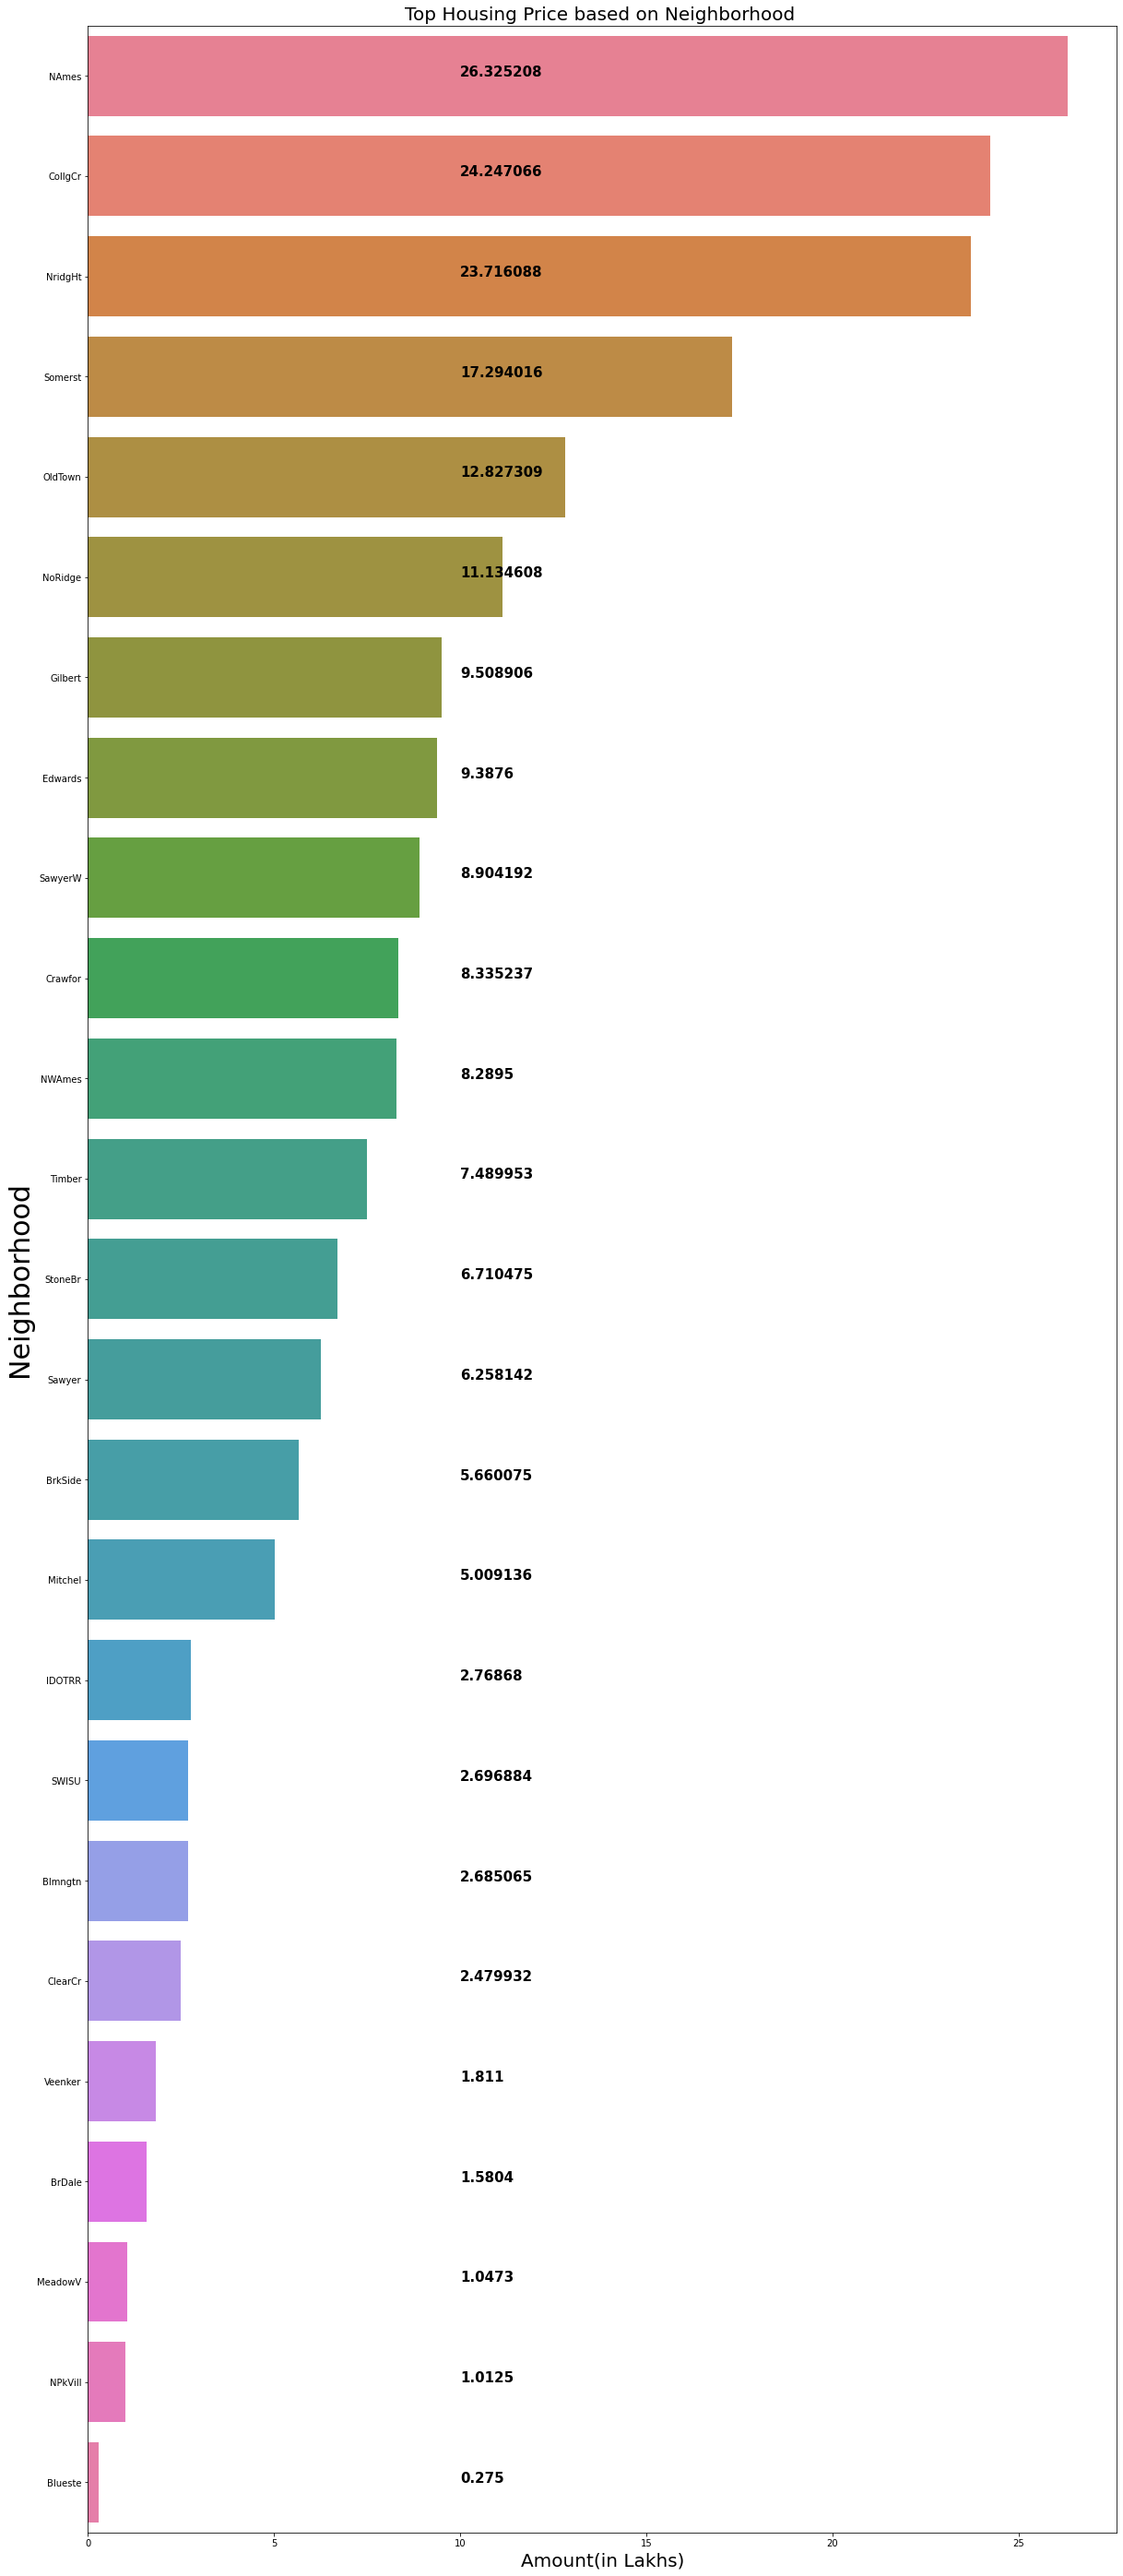

In [25]:
## visualising the 
plt.figure(figsize=(20,50))
ax = sns.barplot(x="Revenue", y="sellingprice",data=sellingprice, palette="husl",linewidth = 2,label='big')
for i,j in enumerate(sellingprice["Revenue"]):
    ax.text(10, i, j, weight="bold", color = 'black', fontsize =15,ha='left')
plt.title("Top Housing Price based on Neighborhood ",fontsize=20)
ax.set_xlabel(xlabel = 'Amount(in Lakhs)', fontsize = 20)
ax.set_ylabel(ylabel = 'Neighborhood', fontsize = 30)
plt.show()
del sellingprice

In [26]:
Housing=data.copy()

In [27]:
Housing.sort_values(by='SalePrice',ascending=False,inplace=True) ## sort the Housingtype according to the Price of the house

In [28]:
Housing['SalePrice']/=100000
Housing=Housing[Housing['HouseStyle']!='others']
Housing=Housing[:10]

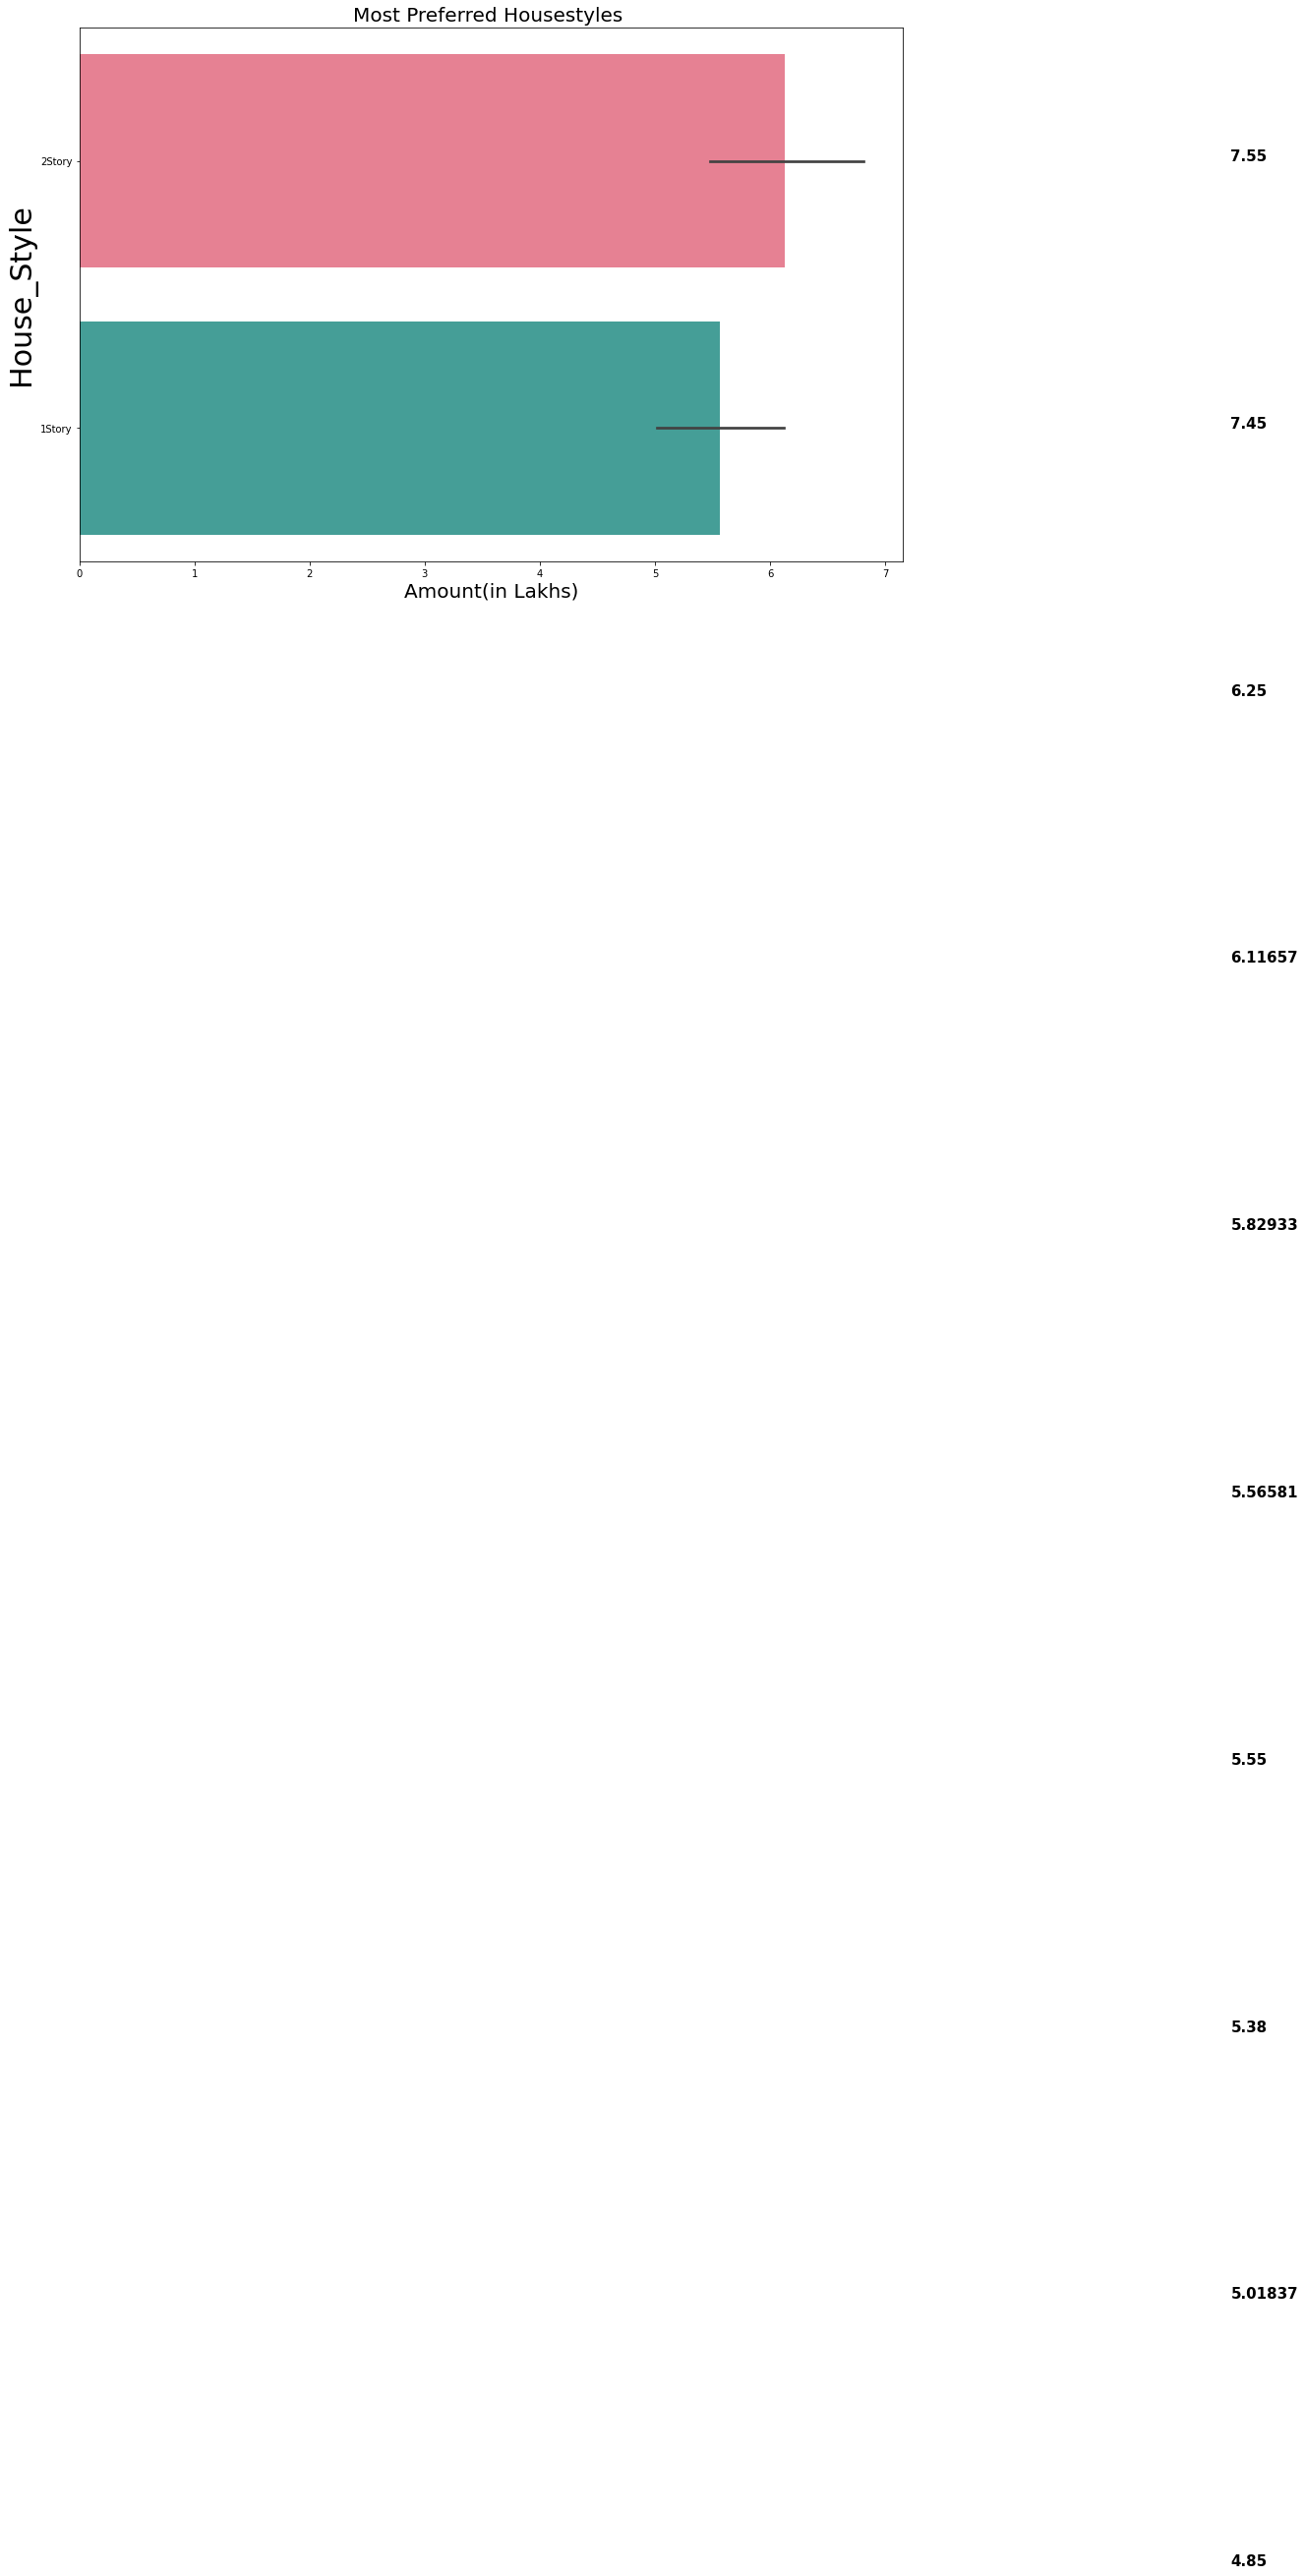

In [30]:
# visualizing the biggest investors
plt.figure(figsize=(15,10))
ax = sns.barplot(x="SalePrice", y="HouseStyle",data=Housing, palette="husl",linewidth = 2,label='big')
for i,j in enumerate(Housing["SalePrice"]):
    ax.text(10, i, j, weight="bold", color = 'black', fontsize =15,ha='left')
plt.title("Most Preferred Housestyles ",fontsize=20)
ax.set_xlabel(xlabel = 'Amount(in Lakhs)', fontsize = 20)
ax.set_ylabel(ylabel = 'House_Style', fontsize = 30)
plt.show()
del Housing

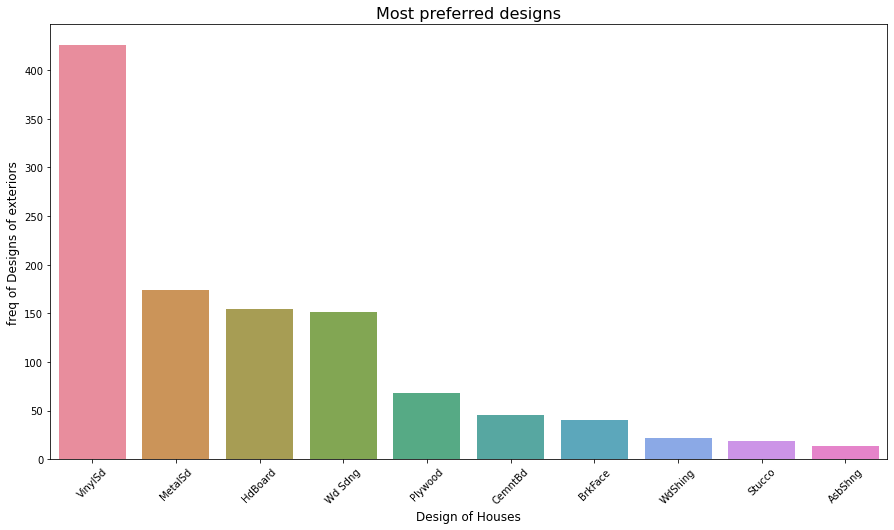

In [31]:
# visualizing the most valued exterior designs taken into account for buying a House
design = data['Exterior1st'].value_counts().head(10)
plt.figure(figsize=(15,8))
sns.barplot(design.index, design.values, alpha=0.9, palette="husl")
plt.xticks(rotation=45)
plt.xlabel('Design of Houses', fontsize=12)
plt.ylabel('freq of Designs of exteriors', fontsize=12)
plt.title("Most preferred designs", fontsize=16)
plt.show()

In [33]:
# getting the names of designs
names = data[data['Exterior1st']!='others']["Exterior1st"]

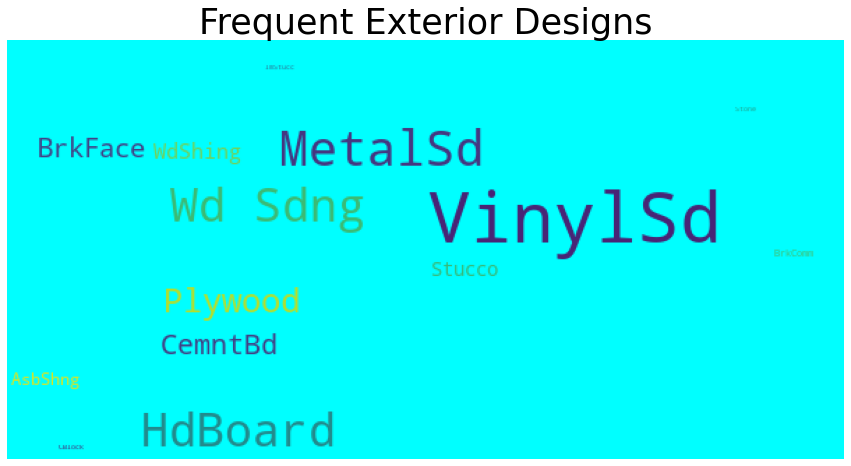

In [34]:
# creating the wordcloud to observe the most frequent exterior designs
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color='cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Frequent Exterior Designs", fontsize=35)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Distribution of Price across Top cities')

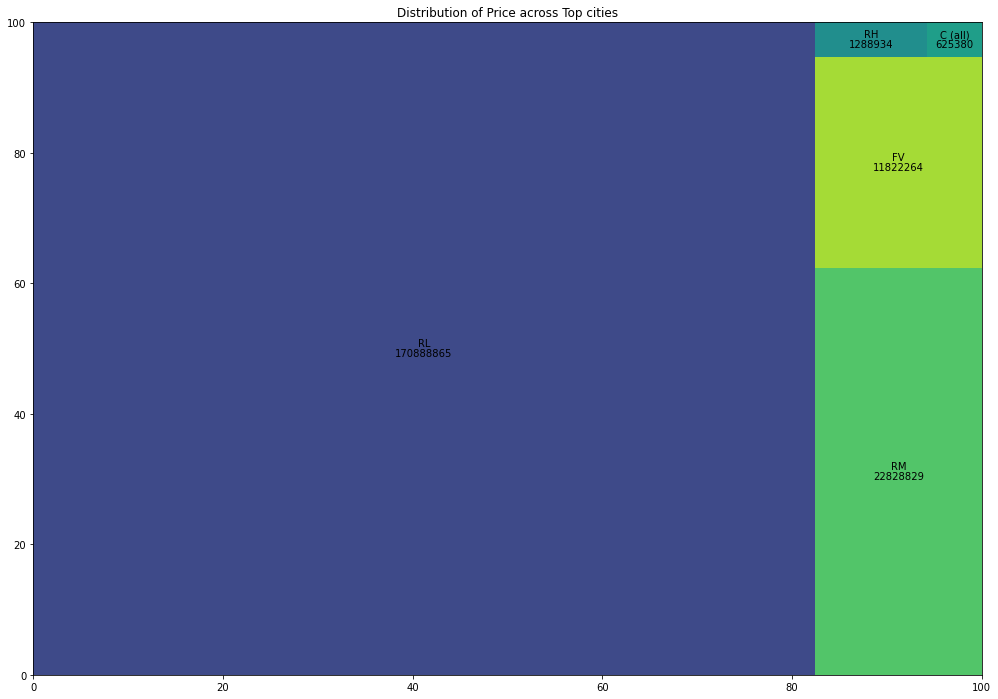

In [36]:
# plot the locations according to the funding given to the starups
plt.figure(figsize=(17,12))
mean_amount = data.groupby('MSZoning').sum()["SalePrice"].sort_values(ascending=False).head(15)
squarify.plot(sizes=mean_amount.values,label=mean_amount.index, value=mean_amount.values)
plt.title('Distribution of Price across Top cities')

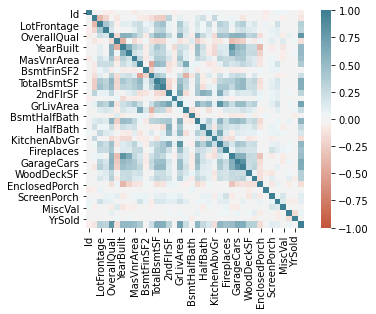

In [37]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# Feature Engineering

In [38]:
data['WoodDeckSF'].unique()

array([298,   0, 192,  40, 255,  90, 147, 160,  48, 240, 171, 100, 222,
       288,  49, 203, 113, 392, 196, 168, 112, 106, 857, 115, 120,  12,
       144, 300,  74, 127, 158, 140, 182, 224,  80, 367, 188, 105,  98,
       276, 239, 400, 178, 210, 441, 116, 280, 104,  87, 132, 238, 139,
       108, 351, 209, 216, 248, 143, 365, 197, 123, 138, 333, 250, 292,
        95, 262,  81, 289, 124, 172, 110, 208, 468, 256, 302, 340, 184,
       201, 142, 122, 135, 495, 536,  64, 353,  66, 159, 146, 296, 125,
        44, 215, 264, 200,  96, 414, 519, 206, 260, 324, 156, 220,  38,
       261, 126, 270,  78, 169, 320, 268,  72, 349,  35, 326, 382, 180,
       161, 179, 103, 148, 335, 176, 390, 312, 185, 269, 195,  57, 236,
       517, 426,  28, 316, 322, 257, 416, 344,  68, 327, 237, 165, 187,
       181,  92, 228, 245, 503, 315, 241, 403,  36,  52, 265, 207, 290,
       278,  70, 418, 234, 486,  26,  97, 272, 121, 243, 154, 384,  86,
       194, 421, 150, 509, 394, 252, 136, 170, 474, 214, 199, 16

In [39]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
v = TfidfVectorizer(stop_words='english',analyzer='word',max_features=500) ## vector should create vector for 800 most weightage words
x = v.fit_transform(data['Exterior1st'])

In [43]:
data.reset_index(drop=True,inplace=True) 

In [44]:
t=x.toarray()   # converting vector list to array

In [45]:
dt=pd.DataFrame(t)

In [46]:
dt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.707107,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0
1114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0
1115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0
1116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [47]:
df=pd.concat([data,dt],axis=1)   ## concatenating the tf-idf vectors with prevoius dataframe

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv('C:/Users/monal/Downloads/train.csv')

In [50]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
# missing values
missing_values=df.isnull().sum() 
# missing value in %
percent_missing = df.isnull().sum()/df.shape[0]*100 

value = {'missing_values ':missing_values, 'percent_missing %':percent_missing , 'data type' : df.dtypes}
missing_df=pd.DataFrame(value)
missing_df

,missing_values,percent_missing %,data type
Id,0,0.000000,int64
MSSubClass,0,0.000000,int64
MSZoning,0,0.000000,object
LotFrontage,259,17.739726,float64
LotArea,0,0.000000,int64
...,...,...,...
MoSold,0,0.000000,int64
YrSold,0,0.000000,int64
SaleType,0,0.000000,object
SaleCondition,0,0.000000,object


In [53]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(5)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


In [56]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['SaleCondition'] = df['SaleCondition'].fillna(df['SaleCondition'].mode()[0])
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])


In [57]:
df[['SaleType','SaleCondition','MSZoning']].isnull().sum()

SaleType         0
SaleCondition    0
MSZoning         0
dtype: int64